### Project Stage - III (Distributions and Hypothesis Testing)
#### Goals

* The goal of Stage III is to develop distributions and formal hypothesis tests for the intuitions you had in Stage I and II and utilize statistical modeling to prove/disprove them.

In [1]:
import pandas as pd
import numpy as np
import datetime
from scipy.stats import kurtosis, poisson
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from IPython.display import Image, display


* During this phase of the project, we employ the above mentioned libraries to create distributions and formulate hypotheses.
### Use the state data (the state of your choice) generated in Stage II to fit a distribution to the number of COVID-19 cases. (25 points)

In [2]:
cases=pd.read_csv("modified_cases.csv")# reading modified_cases.csv file
deaths=pd.read_csv("modified_deaths.csv")# reading modified_deaths.csv file

* Reviewing the altered data on cases and deaths that underwent analysis and was obtained during the preceding project stage.

In [3]:
cases['date'] = pd.to_datetime(cases['date'])
deaths['date'] = pd.to_datetime(deaths['date'])

* Converting the date columns in the dataset into a Pandas datetime format to facilitate their seamless utilization.

In [4]:
con1= cases['State'] == "SC"  #filtering the rows with state carolina for cases data
con2= deaths['State'] == "SC"  #filtering the rows with state carolina for deathn data

* In the preceding cell, we give condidtion to filtered the rows in the datasets for cases and death data, specifically focusing on the state of South Carolina.

In [5]:
case_data=cases[con1]
#case_data

* Filtering rows in the dataset for cases data, specifically focusing on the state of South Carolina.

In [6]:
weekly_cases = case_data.groupby(['County Name', pd.Grouper(key='date', freq='W-Mon')])['cases'].sum().reset_index()
#weekly_cases

* Creating weekly statistics for the cases reported in the specified timeline for the state.

In [7]:
death_data=deaths[con2]
#death_data

* Filtering rows in the dataset for death data, specifically focusing on the state of South Carolina.

In [8]:
weekly_deaths= death_data.groupby(['County Name', pd.Grouper(key='date', freq='W-Mon')])['deaths'].sum().reset_index()
#weekly_deaths

* Creating weekly statistics for the death cases reported in the specified timeline for the state.

### Describe the type of distribution (modality) and its statistics (moments of a distribution - center, variance, skewness, kurtosis) in the report and the notebook.

In [9]:
# Calculating summary statistics for SC state
mean_val= case_data['cases'].mean()
median_val= case_data['cases'].median()
variance_val= case_data['cases'].var()
skewness_val= case_data['cases'].skew()

# Calculating kurtosis for the "cases" column in  SC state
kurtosis_c= kurtosis(case_data['cases'], fisher=False)  # Use fisher=False for Pearson's kurtosis

# Print summary statistics

print("Summary Statistics for cases in SC:")
print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Variance: {variance_val}")
print(f"Skewness: {skewness_val}")
print(f"Kurtosis: {kurtosis_c}")


Summary Statistics for cases in SC:
Mean: 3269.079902867715
Median: 1407.0
Variance: 20703590.14592199
Skewness: 2.7073436772525747
Kurtosis: 11.813541518336654


### Examining the statistical information for COVID-19 cases in the state of South Carolina.
* Mean: It's the average number of cases in South Carolina.
* Median: The middle value of the cases data. Half of the values are above this number, and half are below.
* Variance: A measure of how spread out the cases are from the mean. Higher variance indicates more spread.
* Skewness: Describes the asymmetry in the distribution of cases. Positive skewness means the data is skewed to the right (more cases on the higher end).
* Kurtosis: Measures the tails of the distribution. Higher kurtosis indicates more data in the tails (extreme values).
* The provided statistics for South Carolina are:
     - Mean: 3269.08 cases
     - Median: 1407 cases
     - Variance: 20,703,590.15
     - Skewness: 2.71 (positively skewed)
     - Kurtosis: 11.81 (heavier tails than a normal distribution)

### Graphically plot the distribution and describe the distribution statistics.

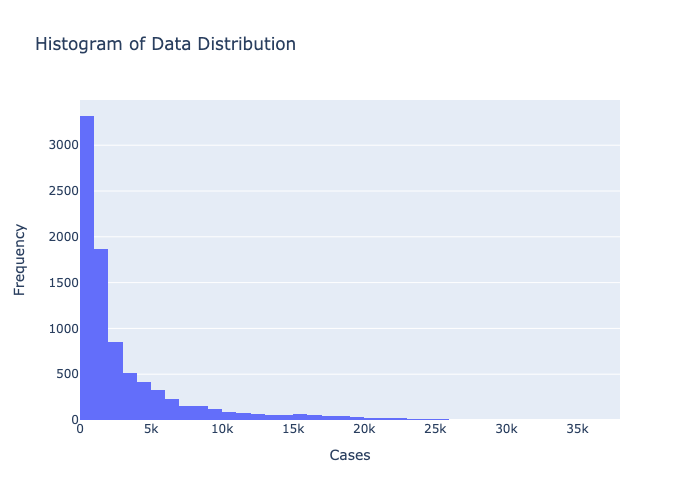

In [10]:
# Create a histogram using Plotly Express
fig = px.histogram(case_data, x='cases', nbins=50, title='Histogram of Data Distribution', labels={'cases': 'Cases'})
fig.update_xaxes(title_text='Cases')
fig.update_yaxes(title_text='Frequency')

# Convert the figure to a static image and display it in the notebook
static_image = fig.to_image(format="png")
Image(static_image)

Based on the observations from the above histogram for cases in SC, we can conclude that the distribution exhibits an asymmetric, right-skewed modality. 
Examining these observations:
* A majority of values cluster on the left side, suggesting that most cases are skewed towards the lower end of the spectrum.
* On the right side, only a few values are present, indicating the potential existence of a tail or outliers, albeit infrequently.
* The low frequency of cases on the right side, coupled with the predominant concentration on the left, underscores the right-skewed nature. The distribution is elongated towards the right, primarily due to the presence of a small number of higher values.

Hence, the distribution is likely to demonstrate a right-skewed pattern, characterized by a lengthier tail on the right side and a concentration of the majority of cases towards the lower values on the left side.

In [11]:
# Calculate summary statistics
mean_val1= death_data['deaths'].mean()
median_val1= death_data['deaths'].median()
variance_val1= death_data['deaths'].var()
skewness_val1= death_data['deaths'].skew()

# Calculate kurtosis for the "cases" column
kurtosis_d= kurtosis(death_data['deaths'], fisher=False)  # Use fisher=False for Pearson's kurtosis

# Print summary statistics
print("Summary Statistics for deaths in SC:")
print(f"Mean: {mean_val1}")
print(f"Median: {median_val1}")
print(f"Variance: {variance_val1}")
print(f"Skewness: {skewness_val1}")
print(f"Kurtosis: {kurtosis_d}")

Summary Statistics for deaths in SC:
Mean: 67.44634597594819
Median: 39.0
Variance: 6089.03308714386
Skewness: 2.048682867246123
Kurtosis: 7.245632194148487


### Examining the statistical information for COVID-19 death cases in the state of South Carolina.
* Mean: The average number of deaths is around 67.45.
* Median: The middle value in the death count distribution is 39.
* Variance: Deaths data is dispersed with a variance of 6089.03.
* Skewness: The distribution is moderately right-skewed (2.05), indicating more deaths on the higher end.
* Kurtosis: The kurtosis of 7.25 suggests a distribution with relatively heavy tails and a peaked shape compared to a normal distribution (kurtosis of 3).

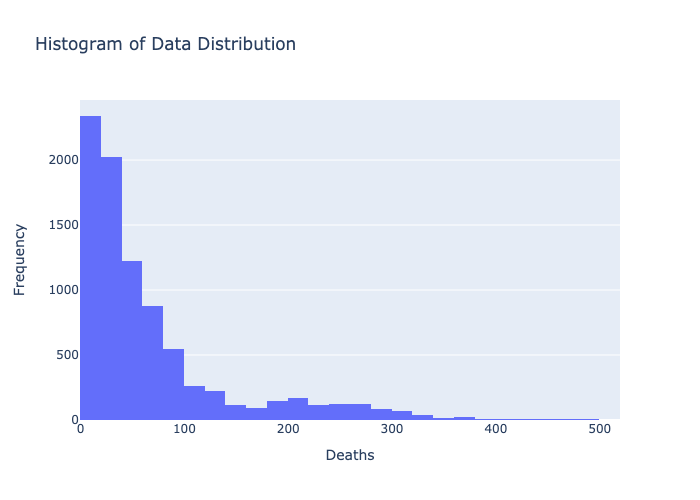

In [12]:
# Create a histogram using Plotly Express
fig = px.histogram(death_data, x='deaths', nbins=50, title='Histogram of Data Distribution', labels={'deaths': 'Deaths'})
fig.update_xaxes(title_text='Deaths')
fig.update_yaxes(title_text='Frequency')

# Convert the figure to a static image and display it in the notebook
static_image = fig.to_image(format="png")
Image(static_image)

### If using discrete values, calculate the Probability Mass Function for the individual values or range (if using histogram) and plot that.

In [13]:
pmf = case_data['cases'].value_counts(normalize=True).sort_index()
pmf

cases
0        0.021277
17       0.000231
18       0.000116
21       0.000231
26       0.000231
           ...   
35719    0.000116
35987    0.000116
36390    0.000116
36838    0.000116
37327    0.000116
Name: proportion, Length: 4380, dtype: float64

* The above code line computes the Probability Mass Function (PMF) for the 'cases' data within the case_data DataFrame. 
* The PMF provides the likelihood of each distinct case count, and the code normalizes these likelihoods to guarantee they sum up to 1.
* The resulting PMF is organized in ascending order according to the unique case counts.

In [14]:
pmf = case_data['cases'].dropna().value_counts(normalize=True).sort_index()
#pmf

The above cell does the following:
* It focuses on the 'cases' data in the case_data DataFrame.
* It removes any rows with missing values ('NaN') in the 'cases' column.
* It calculates the probability of each unique case count, normalizing the counts to represent probabilities.
* Finally, it sorts these probabilities in ascending order based on the unique case counts.

### Describe the type of distribution (modality)  in the report and the notebook.

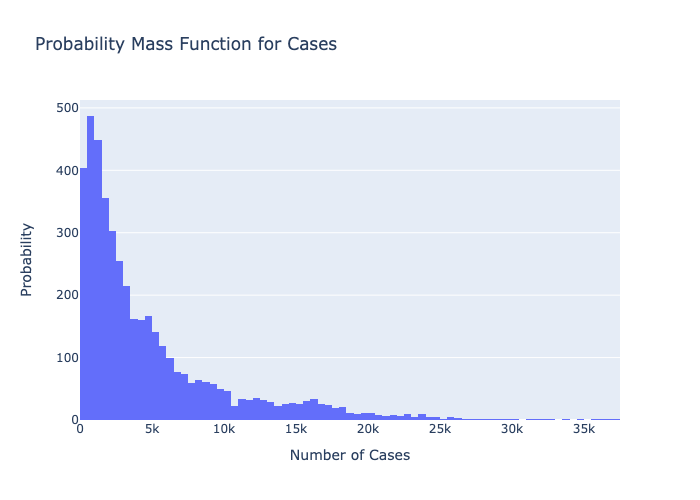

In [15]:
#fig = go.Figure(data=[go.Bar(x=pmf.index, y=pmf, width=0.5)])
fig = go.Figure(data=[go.Histogram(x=pmf.index, y=pmf)])

fig.update_layout(
    xaxis_title='Number of Cases',
    yaxis_title='Probability',
    title='Probability Mass Function for Cases'
)

static_image = fig.to_image(format="png")

# Display the static image 
Image(static_image)

From the above pmf graph we can observe that:
* Shape: The distribution is right-skewed, with values concentrated on the left side and a tail extending to the right.
* Central Tendency: The majority of cases cluster in the 0 to 10,000 range on the x-axis, indicating a peak or central tendency in that region.
* Spread: The distribution has a wide spread, reaching up to 35,000 on the x-axis, suggesting variability in the number of cases.
* Probability Concentration: Most probabilities (y-axis) are concentrated between 0 to 500, indicating a higher likelihood of cases falling within that interval.
* Summary: In summary, the distribution is characterized by a right-skewed shape, a peak in the lower range of cases, a broad spread, and a concentration of probabilities in the lower y-axis values.

In [16]:
pmf1= death_data['deaths'].value_counts(normalize=True).sort_index()
pmf1

deaths
0      0.023936
1      0.012373
2      0.011332
3      0.014917
4      0.012488
         ...   
480    0.000116
485    0.000231
494    0.000116
501    0.000116
502    0.000116
Name: proportion, Length: 383, dtype: float64

* The above code calculates the Probability Mass Function (PMF) for the 'deaths' data in the death_data DataFrame.
* The PMF indicates the probability of each unique death count, and the code ensures these probabilities add up to 1 by normalizing them.
* The resulting PMF is then sorted in ascending order based on the distinct death counts.

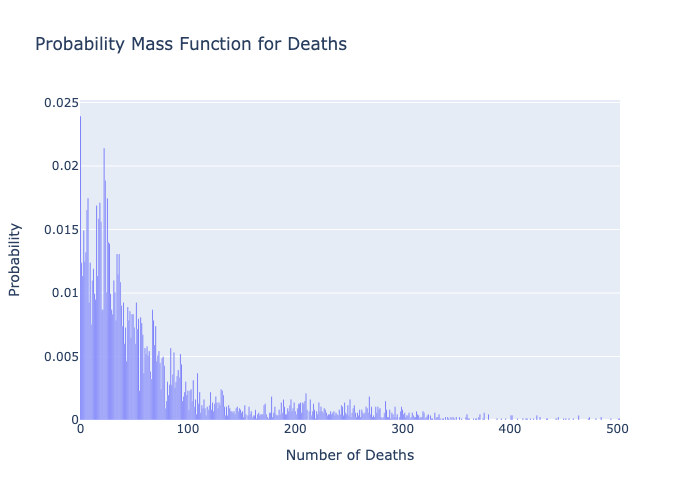

In [17]:
fig1= go.Figure(data=[go.Bar(x=pmf1.index, y=pmf1,marker_color="blue")])

# Customize the layout
fig1.update_layout(
    xaxis_title='Number of Deaths',
    yaxis_title='Probability',
    title='Probability Mass Function for Deaths'
)
static_image = fig1.to_image(format="png")

# Display the static image 
Image(static_image)

Observation of PMF graph for death cases
* Shape: The distribution is right-skewed, as the probability values decrease as the death counts increase. There is a long tail on the right side of the distribution.
* Central Tendency: The majority of death counts have relatively low probabilities, and the peak of the distribution occurs at lower death counts.
* Spread: The distribution is concentrated towards the lower death counts, but there are some higher death counts with lower probabilities, contributing to the spread.
* Outliers: There are a few death counts with higher probabilities compared to others, contributing to the long tail on the right side of the distribution.
* In summary, the distribution of death counts appears to be right-skewed, with a concentration towards lower values, a spread towards higher values, and a few outliers with higher probabilities. The blue color in the plot adds a visual element to highlight the distribution.

### Compare the distribution and its statistics to 5 other states of your choosing.

In [18]:
states=['SC','NC','AR','CO','ID','LA']

In the preceding section, we selected South Carolina (SC) along with five additional states (North Carolina - NC, Arkansas - AR, Colorado - CO, Idaho - ID, Louisiana - LA) for the purpose of comparing their distributions and statistics.

In [19]:
states_data= {}

# Loop through the selected states
for state in states:
    # Filter data for the current state
    data = cases[cases["State"] == state]
    #print(data)
    # Calculate summary statistics
    mean_val= data['cases'].mean()
    median_val= data['cases'].median()
    variance_val= data['cases'].var()
    skewness_val= data['cases'].skew()
    kurtosis_val= kurtosis(data['cases'], fisher=False)

    # Store statistics in the dictionary
    states_data[state] = {
        "Mean": mean_val,
        "Median": median_val,
        "Variance": variance_val,
        "Skewness": skewness_val,
        "Kurtosis": kurtosis_val
    }


* The code above defines a dictionary named states_data and then iterates through a list of states.
* For each state, it filters data from a DataFrame (cases) based on the current state. 
* The code then calculates and stores summary statistics (mean, median, variance, skewness, and kurtosis) of the 'cases' column for that state in the states_data dictionary. 
* The result is a dictionary where each state is a key, and its corresponding statistics are stored as a nested dictionary.

In [20]:
for state, stats in states_data.items():
    print(f"Summary Statistics for {state}:")
    print(f"Mean: {stats['Mean']}")
    print(f"Median: {stats['Median']}")
    print(f"Variance: {stats['Variance']}")
    print(f"Skewness: {stats['Skewness']}")
    print(f"Kurtosis: {stats['Kurtosis']}")
    print()


Summary Statistics for SC:
Mean: 3269.079902867715
Median: 1407.0
Variance: 20703590.14592199
Skewness: 2.7073436772525747
Kurtosis: 11.813541518336654

Summary Statistics for NC:
Mean: 2366.740368058545
Median: 1073.0
Variance: 19831970.02390771
Skewness: 5.907495014419035
Kurtosis: 51.39907348920638

Summary Statistics for AR:
Mean: 1272.034038901602
Median: 516.0
Variance: 5292495.242351261
Skewness: 4.604733880658015
Kurtosis: 30.47810813514834

Summary Statistics for CO:
Mean: 1796.8853678929765
Median: 148.0
Variance: 26903876.137121793
Skewness: 4.8934795605226835
Kurtosis: 30.77862919977611

Summary Statistics for ID:
Mean: 1243.9072463768116
Median: 265.0
Variance: 10839520.578664696
Skewness: 5.654773421489811
Kurtosis: 43.88635015129265

Summary Statistics for LA:
Mean: 2652.321404682274
Median: 1216.0
Variance: 14862739.205160938
Skewness: 2.9782562377137767
Kurtosis: 13.387822167757816



### Analysing SC statistics with 5 other states
When comparing COVID-19 cases in South Carolina (SC) with five other states, significant variations emerge in key statistics. 
SC has a higher mean and median compared to states like Arkansas (AR) and Colorado (CO), but lower than North Carolina (NC). 
Skewness and kurtosis values highlight differing distribution shapes, with NC exhibiting particularly high skewness and kurtosis. 
* South Carolina (SC):
    - Higher mean (3269.08) and median (1407.0) compared to some states.
    - Moderate skewness (2.71) and kurtosis (11.81).
* North Carolina (NC):
    - Lower mean (2366.74) and median (1073.0) compared to SC.
    - High skewness (5.91) and exceptionally high kurtosis (51.40).
* Arkansas (AR):
    - Lower mean (1272.03) and median (516.0).
    - Moderate skewness (4.60) and kurtosis (30.48).
* Colorado (CO):
    - Lower mean (1796.89) and median (148.0) than SC.
    - Moderate skewness (4.89) and kurtosis (30.78).
* Idaho (ID):
    - Lower mean (1243.91) and median (265.0) than SC.
    - High skewness (5.65) and high kurtosis (43.89).
* Louisiana (LA):
     - Higher mean (2652.32) and median (1216.0) than some states.
     - Moderate skewness (2.98) and kurtosis (13.39).

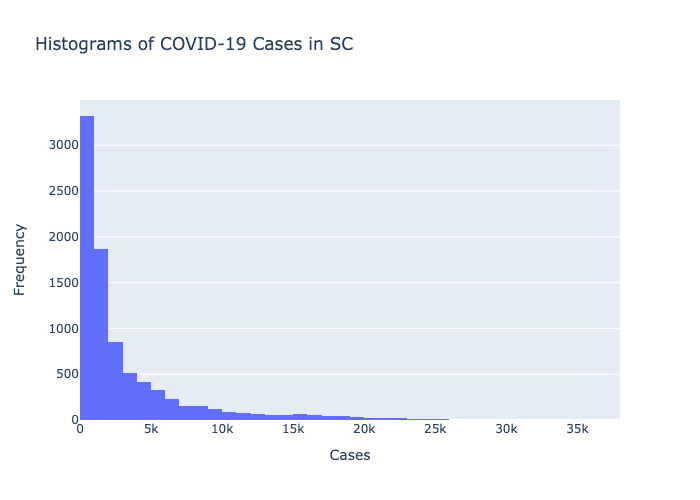

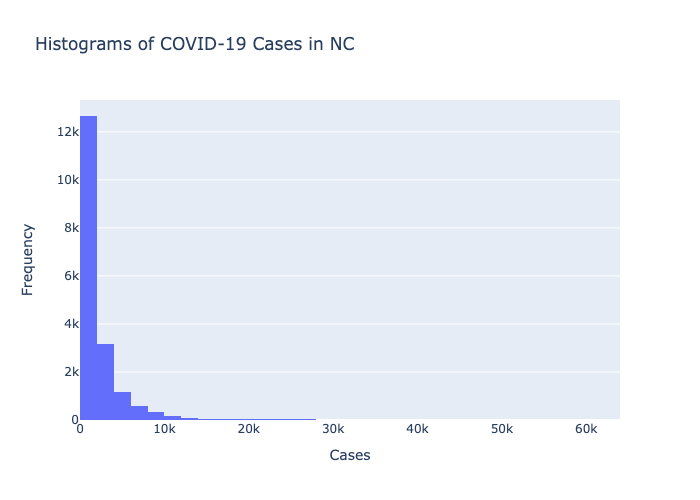

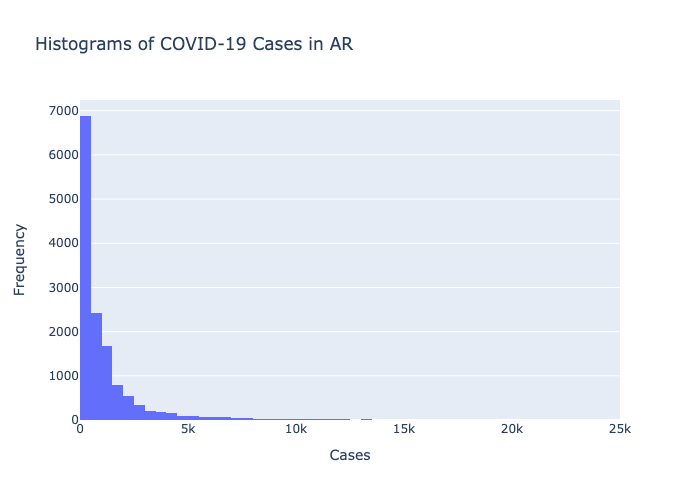

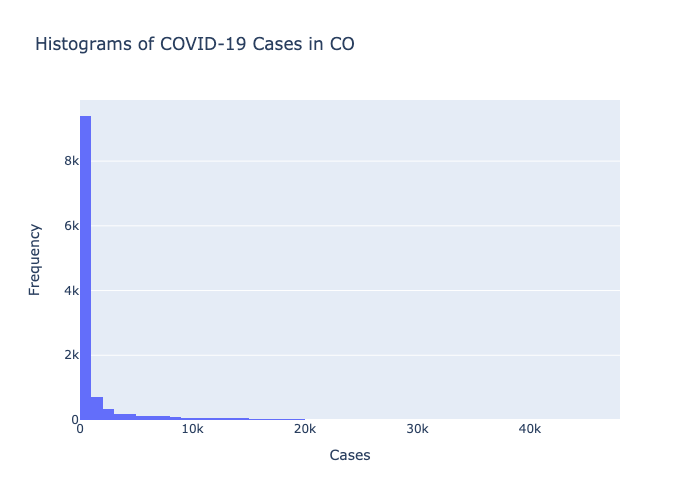

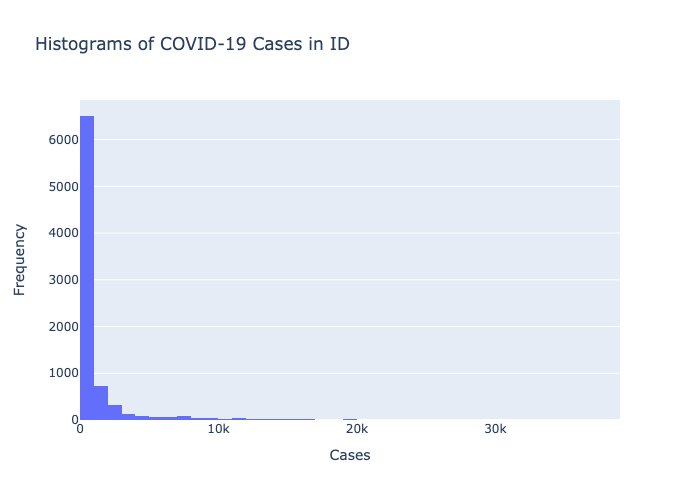

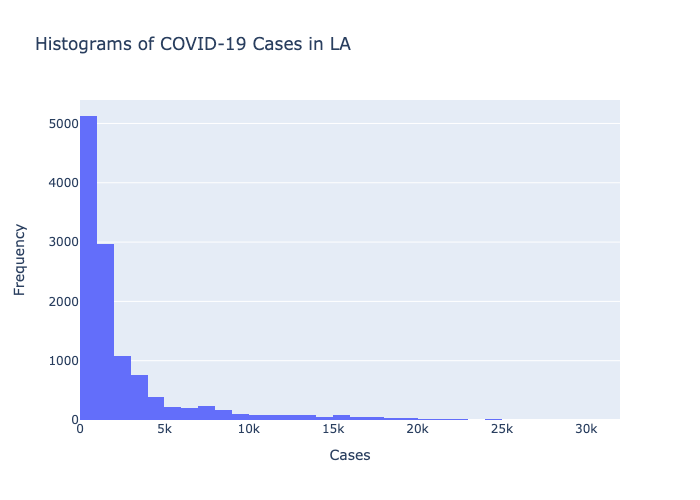

In [21]:


states = ['SC', 'NC', 'AR', 'CO', 'ID', 'LA']
data1=cases[cases['State'] == "SC" ]
data2=cases[cases['State'] == "NC" ]
data3=cases[cases['State'] == "AR" ]
data4=cases[cases['State'] == "CO" ]
data5=cases[cases['State'] == "ID" ]
data6=cases[cases['State'] == "LA" ]

fig1= go.Figure()
hist_trace = go.Histogram(x=data1['cases'], nbinsx=50, name=state)
fig1.add_trace(hist_trace)
fig1.update_layout(
    title=f'Histograms of COVID-19 Cases in SC',
    xaxis_title='Cases',
    yaxis_title='Frequency',
    barmode='overlay'  # Overlay bars on top of each other
)
static_image = pio.to_image(fig1, format="png")
display(Image(static_image))


fig2= go.Figure()
hist_trace = go.Histogram(x=data2['cases'], nbinsx=50, name=state)
fig2.add_trace(hist_trace)
fig2.update_layout(
    title=f'Histograms of COVID-19 Cases in NC',
    xaxis_title='Cases',
    yaxis_title='Frequency',
    barmode='overlay'  # Overlay bars on top of each other
)
static_image = pio.to_image(fig2, format="png")
display(Image(static_image))


fig3= go.Figure()
hist_trace = go.Histogram(x=data3['cases'], nbinsx=50, name=state)
fig3.add_trace(hist_trace)
fig3.update_layout(
    title=f'Histograms of COVID-19 Cases in AR',
    xaxis_title='Cases',
    yaxis_title='Frequency',
    barmode='overlay'  # Overlay bars on top of each other
)
static_image = pio.to_image(fig3, format="png")
display(Image(static_image))


fig4= go.Figure()
hist_trace = go.Histogram(x=data4['cases'], nbinsx=50, name=state)
fig4.add_trace(hist_trace)
fig4.update_layout(
    title=f'Histograms of COVID-19 Cases in CO',
    xaxis_title='Cases',
    yaxis_title='Frequency',
    barmode='overlay'  # Overlay bars on top of each other
)
static_image = pio.to_image(fig4, format="png")
display(Image(static_image))


fig5= go.Figure()
hist_trace = go.Histogram(x=data5['cases'], nbinsx=50, name=state)
fig5.add_trace(hist_trace)
fig5.update_layout(
    title=f'Histograms of COVID-19 Cases in ID',
    xaxis_title='Cases',
    yaxis_title='Frequency',
    barmode='overlay'  # Overlay bars on top of each other
)
static_image = pio.to_image(fig5, format="png")
display(Image(static_image))


fig6= go.Figure()
hist_trace = go.Histogram(x=data6['cases'], nbinsx=50, name=state)
fig6.add_trace(hist_trace)
fig6.update_layout(
    title=f'Histograms of COVID-19 Cases in LA',
    xaxis_title='Cases',
    yaxis_title='Frequency',
    barmode='overlay'  # Overlay bars on top of each other
)
static_image = pio.to_image(fig6, format="png")
display(Image(static_image))

###  Describe if the distributions look different and what does that imply.

Based on the statistics and observing the histograms for COVID-19 cases in South Carolina (SC) compared with five other states, we can describe the distributions as follows:

* South Carolina (SC):
    - Histogram shape: Right-skewed with a peak in the mid-range of cases.
    - Spread: Moderate to wide spread, with a noticeable tail towards higher case counts.
* North Carolina (NC):
    - Histogram shape: Highly right-skewed with an extended tail on the right.
    - Spread: Concentrated towards lower case counts, but with a few extremely high values contributing to a long right tail.
* Arkansas (AR):
    - Histogram shape: Right-skewed, concentrated towards lower case counts.
    - Spread: Moderate, with a peak at lower case counts and a tail towards higher values.
* Colorado (CO):
    - Histogram shape: Right-skewed with a peak at very low case counts.
    - Spread: Wide distribution with a spike at low case counts and a tail extending to higher values.
* Idaho (ID):
    - Histogram shape: Highly right-skewed with a peak at very low case counts.
    - Spread: Extensive distribution, concentrated towards lower case counts but with a long right tail.
* Louisiana (LA):
    - Histogram shape: Moderate right-skewed with a peak in the mid-range of case counts.
    - Spread: Moderate, with a concentration towards the middle and some values reaching higher case counts.

### Model a poission distribution of COVID-19 cases and deaths of a state and compare to other 5 states. Describe how the poission modeling is different from the first modeling you did.

*  number of new cases and deaths per 100,000 population.
*  The parameter for a poission's distribution will be its mean value. Then for the minimum and maximum range of covid cases you are calculating probability mass function to observe the probability at different points.

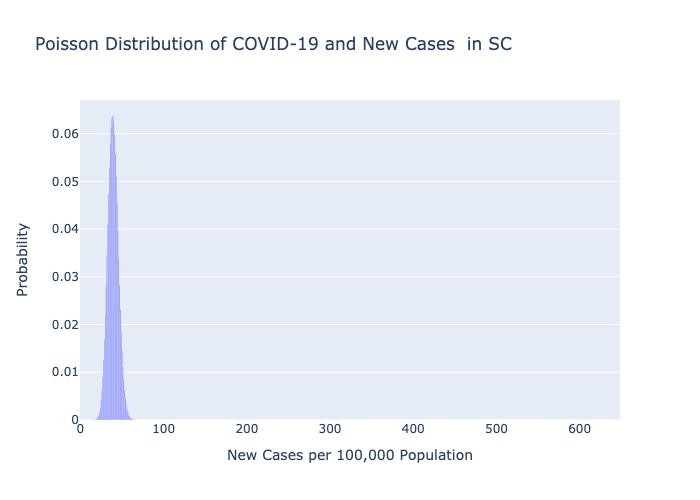

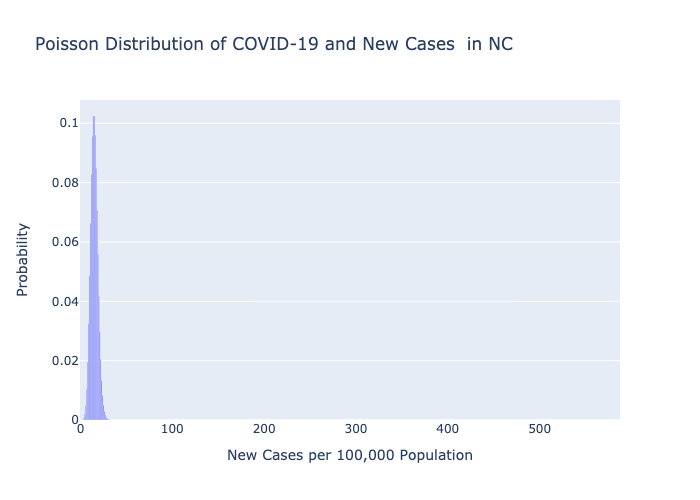

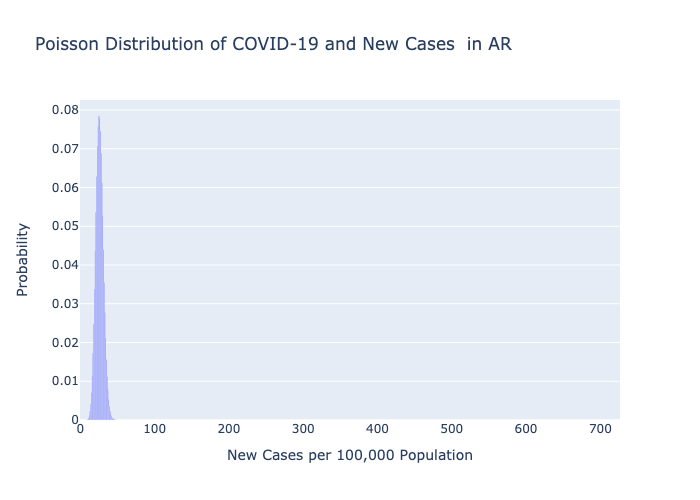

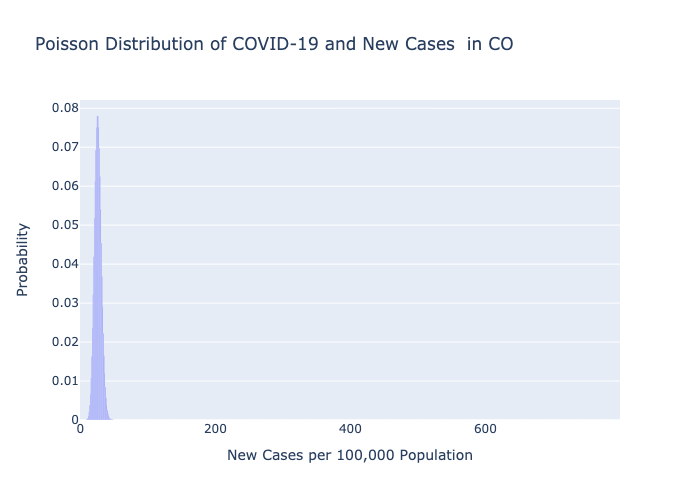

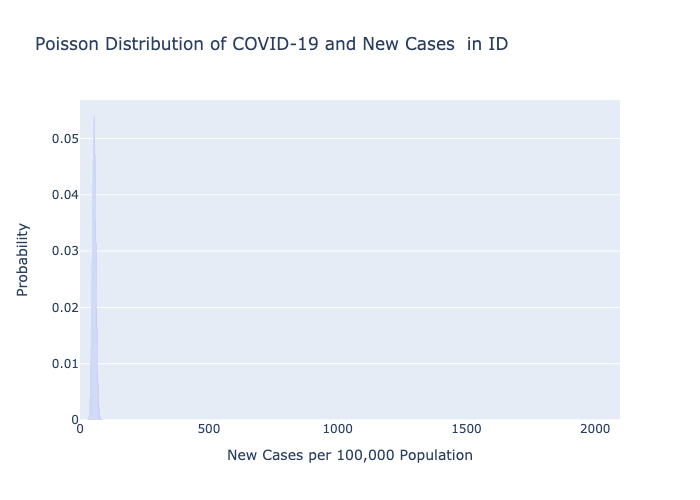

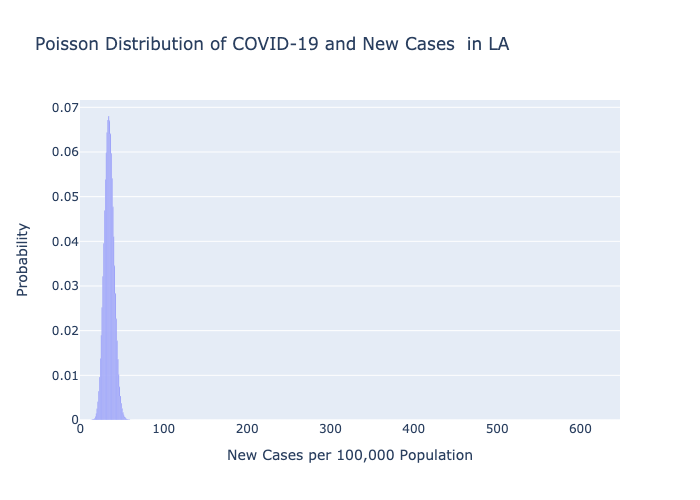

In [22]:
covid_data_df = pd.read_csv("modified_cases.csv")
population_data_df = pd.read_csv("covid_county_population_usafacts.csv")
# Ensuring that the "Date" column is in datetime format
covid_data_df['date'] = pd.to_datetime(covid_data_df['date'])

# Sorting the DataFrame by date and reset the index
covid_data_df = covid_data_df.sort_values(by=['date']).reset_index(drop=True)

# Group the data by "Date"
grouped_data = covid_data_df.groupby('date')

# Calculate the new cases for each group (date)
covid_data_df['new_cases'] = grouped_data['cases'].diff().fillna(0)

# Set negative new cases to zero
covid_data_df['new_cases'] = covid_data_df['new_cases'].apply(lambda x: max(0, x))
def plot_poisson_distribution(state_abbr, covid_data_df, population_data_df):
    # Filter data for the specific state
    state_data_df = covid_data_df[covid_data_df['State'] == state_abbr].copy()

    # Filter population data for the specific state
    state_pop_sum = population_data_df[population_data_df['State'] == state_abbr]['population'].sum()

    # Calculate the number of new cases per 100,000 population
    state_data_df['new_cases_popu'] = (state_data_df['new_cases'] / state_pop_sum) * 100000

    # Calculate the mean (λ) for the Poisson distribution
    mean_val = state_data_df['new_cases_popu'].mean()

    # Set a minimum threshold for the mean value
    min_mean_val = 1.0

    # Model the Poisson distribution
    if mean_val < min_mean_val:
        mean_val = min_mean_val  # Ensure a minimum mean value

    poisson_dist_state = poisson(mean_val)

    # Generate PMF for a range of possible values
    x_values = range(0, int(state_data_df['new_cases_popu'].max()) + 1)
    pmf_values = poisson_dist_state.pmf(x_values)

    # Create a DataFrame for plotting with Plotly
    plot_data = pd.DataFrame({'New Cases per 100,000 Population': x_values, 'Probability': pmf_values})

    # Plot the Poisson distribution using Plotly with blue color
    fig = px.bar(plot_data, x='New Cases per 100,000 Population', y='Probability',
                 labels={'New Cases per 100,000 Population': ' New Cases per 100,000 Population',
                         'Probability': 'Probability'},
                 title=f'Poisson Distribution of COVID-19 and New Cases  in {state_abbr}',
                 color_discrete_sequence=['blue'])

    # Show the plot for each state
    # fig.show()
    static_image = pio.to_image(fig, format="png")
    display(Image(static_image))

# List of state abbreviations to analyze
states_to_analyze_list = ['SC', 'NC', 'AR', 'CO', 'ID', 'LA']
#print(covid_data_df)
# Loop through the states and call the function
for state_abbr in states_to_analyze_list:
    plot_poisson_distribution(state_abbr, covid_data_df, population_data_df)


### Analysing the poisson distribution for SC state along with 5 other states
Based on the above observations
* South Carolina (SC):
    - Distribution Shape: Right-skewed with a peak in the mid-range of cases (20-80).
    - Spread: Concentrated towards moderate case counts.
* North Carolina (NC):
    - Distribution Shape: Highly right-skewed with a sharp peak at very low case counts (0-40).
    - Spread: Heavily concentrated towards lower values.
* Arkansas (AR):
    - Distribution Shape: Right-skewed with a peak at lower case counts (0-50).
    - Spread: Moderate concentration towards lower values.
* Colorado (CO):
    - Distribution Shape: Right-skewed with a peak at very low case counts (0-50).
    - Spread: Moderate concentration towards lower values.
* Idaho (ID):
    - Distribution Shape: Highly right-skewed with a peak at very low case counts (0-100).
    - Spread: Extended distribution with moderate concentration towards lower values.
* Louisiana (LA):
    - Distribution Shape: Right-skewed with a peak in the mid-range of cases (0-60).
    - Spread: Moderate concentration towards moderate case counts.

Summary:
* Most states exhibit right-skewed distributions, indicating a concentration of cases towards the lower end.
* North Carolina (NC) has an extremely right-skewed distribution, heavily concentrated at very low case counts.
* Idaho (ID) stands out with a more extensive distribution, reaching higher case counts, though still right-skewed.
* Overall, the distributions suggest variability in the number of new COVID-19 cases, with some states having a higher concentration towards lower values, while others show more spread and variability.

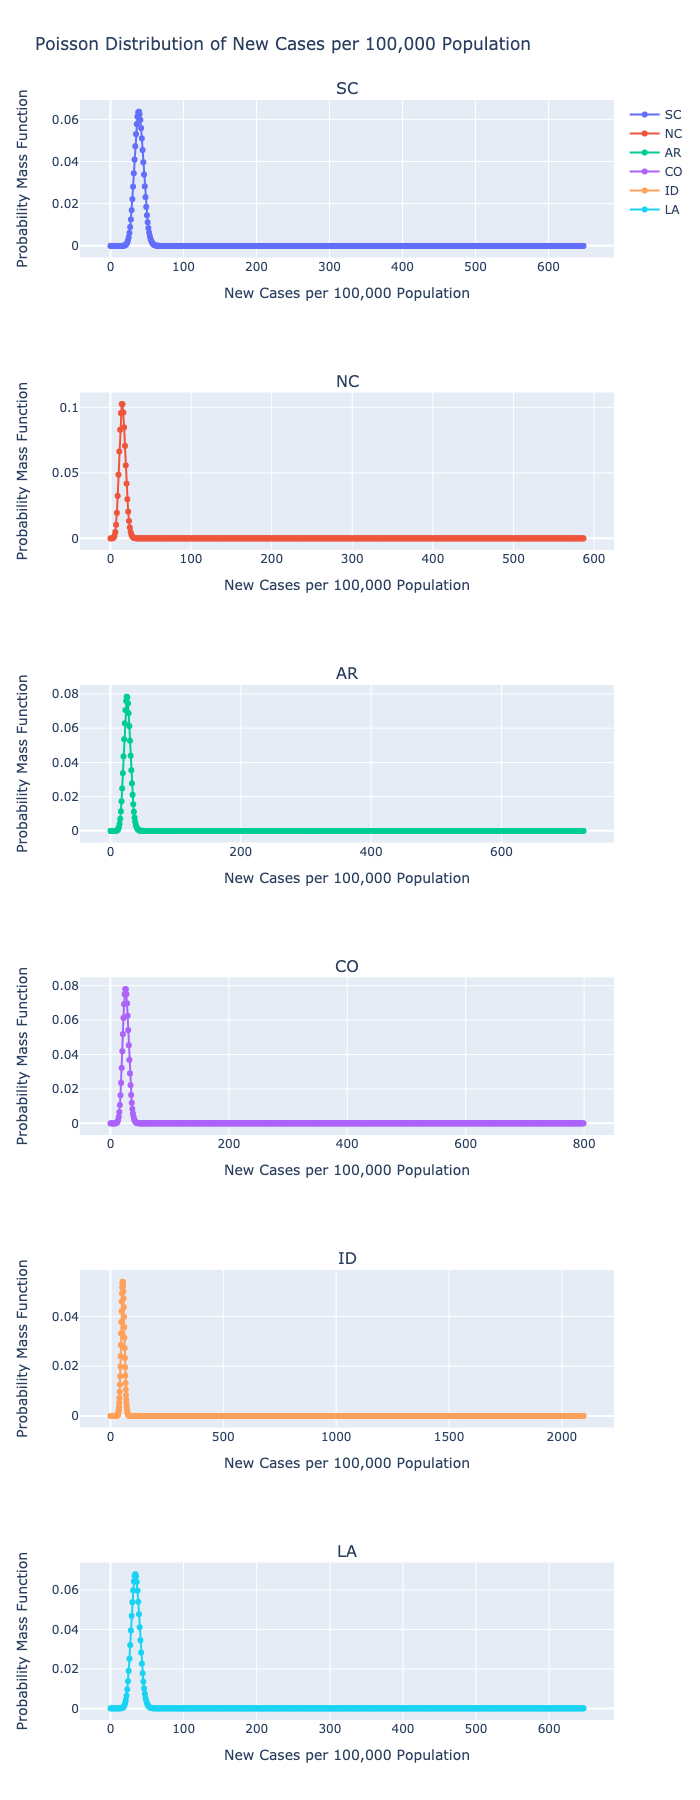

In [23]:
def generate_poisson_trace(state, cases, population_data):
    # Retrieve data for the specified state
    state_data = cases[cases['State'] == state].copy()
    state_population = population_data[population_data['State'] == state]['population'].sum()

    # Calculate new cases per 100,000 population
    state_data.loc[:, 'new_cases_popu'] = (state_data['new_cases'] / state_population) * 100000
    mean_value = max(state_data['new_cases_popu'].mean(), 1.0)

    # Model the Poisson distribution
    poisson_dist = poisson(mean_value)
    x = list(range(0, int(state_data['new_cases_popu'].max()) + 1))
    pmf = poisson_dist.pmf(x)
    # print()
    # Create a trace
    trace = go.Scatter(x=x, y=pmf, mode='lines+markers', name=state)
    return trace

def plot_poisson_distribution_for_states(states):
    # Load data
    cases = pd.read_csv("modified_cases.csv")
    population_data = pd.read_csv("covid_county_population_usafacts.csv")

    # Preprocess data
    cases['date'] = pd.to_datetime(cases['date'])
    cases = cases.sort_values(by=['date']).reset_index(drop=True)
    grouped = cases.groupby('date')
    cases['new_cases'] = grouped['cases'].diff().fillna(0)
    cases['new_cases'] = cases['new_cases'].apply(lambda x: max(0, x))

    # Create an empty list to store traces
    traces = []

    # Create a subplot with multiple rows
    fig = make_subplots(rows=len(states), cols=1, subplot_titles=[f'{state}' for state in states])

    for i, state in enumerate(states):
        # Generate Poisson trace for the state
        trace = generate_poisson_trace(state, cases, population_data)

        # Append the trace to the list
        traces.append(trace)
        #print(trace)

        # Add trace to subplot
        fig.add_trace(trace, row=i+1, col=1)

    # Update subplot layout
    fig.update_layout(height=len(states) * 300, title_text="Poisson Distribution of New Cases per 100,000 Population")
    fig.update_xaxes(title_text="New Cases per 100,000 Population")
    fig.update_yaxes(title_text="Probability Mass Function")

    # Show the plot
    # fig.show()
    static_image = pio.to_image(fig, format="png")
    display(Image(static_image))

# Example usage for multiple states
plot_poisson_distribution_for_states(['SC', 'NC', 'AR', 'CO', 'ID', 'LA'])


### Observations from PMF to new cases graphs
* South Carolina (SC):
    - Distribution Shape: Peaks at very low new cases.
    - Spread: Concentrated towards the left side.
    - Highly right-skewed with a significant concentration of very low case counts.
* North Carolina (NC):
    - Distribution Shape: Peaks at low to moderate new cases.
    - Spread: Moderately concentrated towards the left side.
    - Right-skewed with a broader range of case counts compared to SC.
* Arkansas (AR):
    - Distribution Shape: Peaks at low new cases.
    - Spread: Concentrated towards the left side.
    - Right-skewed with a concentration of low case counts.
* Colorado (CO):
    - Distribution Shape: Peaks at low new cases.
    - Spread: Concentrated towards the left side.
    - Right-skewed with a concentration of low case counts.
* Idaho (ID):
    - Distribution Shape: Peaks at very low new cases.
    - Spread: Extensive, reaching higher case counts with very low probabilities.
    - Highly right-skewed with an extended distribution to higher case counts.
* Louisiana (LA):
    - Distribution Shape: Peaks at low to moderate new cases.
    - Spread: Moderately concentrated towards the left side.
    - Right-skewed with a broader range of case counts compared to SC.

* The distributions for most states are right-skewed, indicating a concentration of new COVID-19 cases towards the lower end.
* Idaho (ID) stands out with a more extensive distribution, reaching higher case counts with very low probabilities.
* Each state exhibits variations in the spread and concentration of new cases, providing insights into the patterns of COVID-19 incidence.

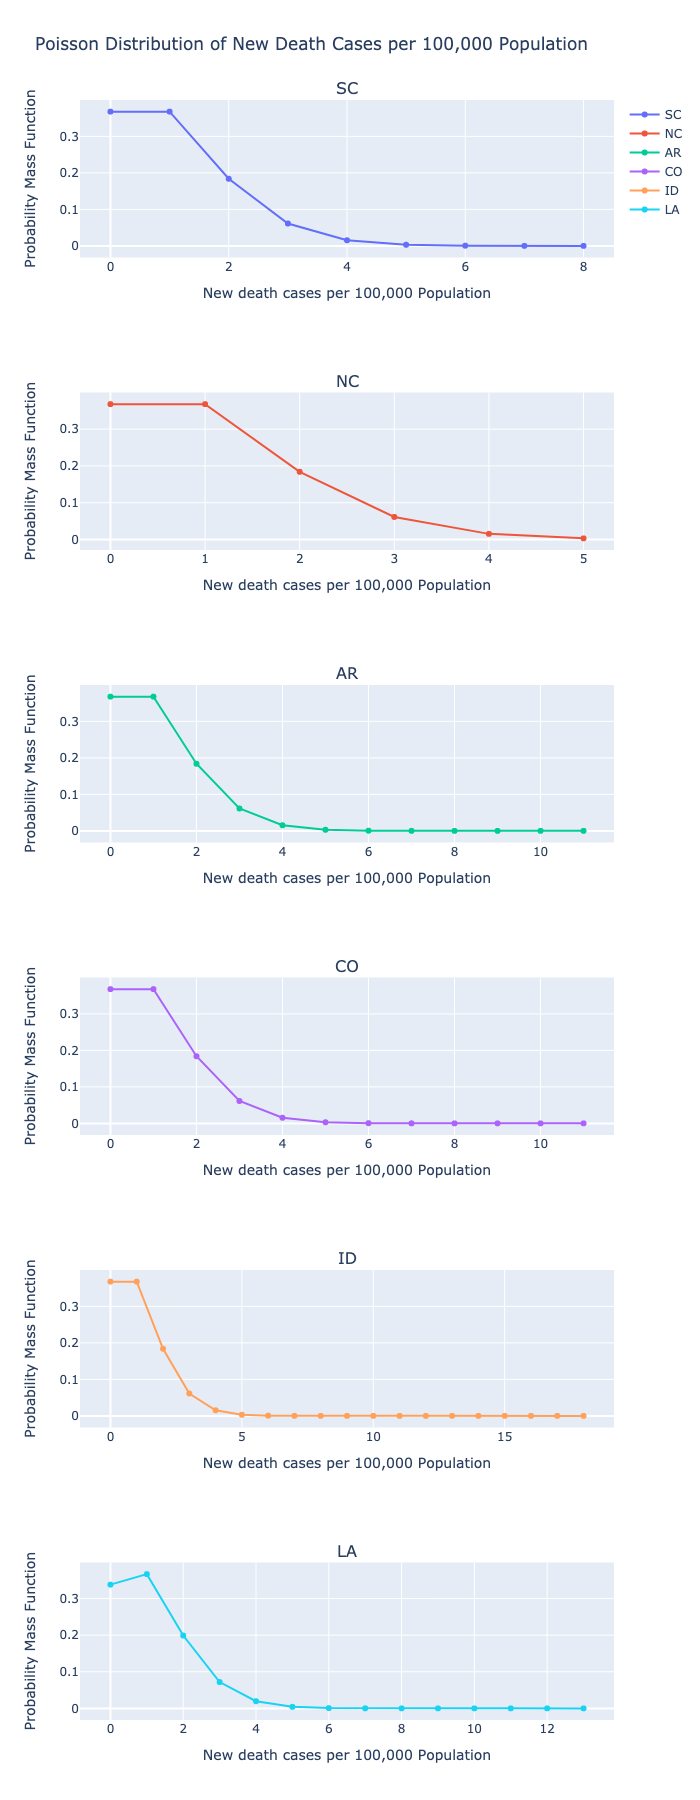

In [24]:
def process_state_data(state, i, death_data, population_data, fig, traces):
    # Retrieve data for the specified state
    state_covid_data = death_data[death_data['State'] == state].copy()
    state_population = population_data[population_data['State'] == state]['population'].sum()

    # Calculate new cases per 100,000 population
    state_covid_data.loc[:, 'new_deaths_popu'] = (state_covid_data['new_deaths'] / state_population) * 100000
    mean_value = max(state_covid_data['new_deaths_popu'].mean(), 1.0)

    # Model the Poisson distribution
    poisson_dist = poisson(mean_value)
    x = list(range(0, int(state_covid_data['new_deaths_popu'].max()) + 1))
    pmf = poisson_dist.pmf(x)

    # Create a trace
    trace = go.Scatter(x=x, y=pmf, mode='lines+markers', name=state)
    traces.append(trace)
    #print(trace)

    # Add trace to subplot
    fig.add_trace(trace, row=i+1, col=1)

def plot_poisson_distribution_for_states(states):
    # Load data
    death_data = pd.read_csv("modified_deaths.csv")
    population_data = pd.read_csv("covid_county_population_usafacts.csv")

    # Preprocess data
    death_data['date'] = pd.to_datetime(death_data['date'])
    death_data = death_data.sort_values(by=['date']).reset_index(drop=True)
    grouped = death_data.groupby('date')
    death_data['new_deaths'] = grouped['deaths'].diff().fillna(0)
    death_data['new_deaths'] = death_data['new_deaths'].apply(lambda x: max(0, x))

    # Create an empty list to store traces
    traces = []

    # Create a subplot with multiple rows
    fig = make_subplots(rows=len(states), cols=1, subplot_titles=[f'{state}' for state in states])

    # Process data for each state
    for i, state in enumerate(states):
        process_state_data(state, i, death_data, population_data, fig, traces)

    # Update subplot layout
    fig.update_layout(height=len(states) * 300, title_text="Poisson Distribution of New Death Cases per 100,000 Population")
    fig.update_xaxes(title_text="New death cases per 100,000 Population")
    fig.update_yaxes(title_text="Probability Mass Function")

    # Show the plot
    #fig.show()
    static_image = pio.to_image(fig, format="png")
    display(Image(static_image))

# Example usage for multiple states
plot_poisson_distribution_for_states(['SC', 'NC', 'AR', 'CO', 'ID', 'LA'])


* South Carolina (SC):
    - Distribution Shape: Peaks at low death cases.
    - Spread: Concentrated towards the left side.
    - Highly right-skewed with a significant concentration of very low death case counts.
* North Carolina (NC):
    - Distribution Shape: Peaks at low death cases.
    - Spread: Concentrated towards the left side.
    - Right-skewed with a concentration of low death case counts.
* Arkansas (AR):
    - Distribution Shape: Peaks at low death cases.
    - Spread: Concentrated towards the left side.
    - Right-skewed with a concentration of low death case counts.
* Colorado (CO):
    - Distribution Shape: Peaks at low death cases.
    - Spread: Concentrated towards the left side.
    - Right-skewed with a concentration of low death case counts.
* Idaho (ID):
    - Distribution Shape: Peaks at very low death cases.
    - Spread: Extensive, reaching higher death case counts with very low probabilities.
    - Highly right-skewed with an extended distribution to higher death case counts.
* Louisiana (LA):
    - Distribution Shape: Peaks at low to moderate death cases.
    - Spread: Moderately concentrated towards the left side.
    - Right-skewed with a broader range of death case counts compared to SC.

* The distributions for most states are right-skewed, indicating a concentration of COVID-19 death cases towards the lower end.
* Idaho (ID) stands out with a more extensive distribution, reaching higher death case counts with very low probabilities.
* Each state exhibits variations in the spread and concentration of death cases, providing insights into the patterns of COVID-19 mortality.

In [25]:
def process_state_data(state, cases_data, population_data, traces):
    # Retrieve data for the specified state
    state_covid_data = cases_data[cases_data['State'] == state].copy()
    state_population = population_data[population_data['State'] == state]['population'].sum()

    # Calculate new cases per 100,000 population
    state_covid_data.loc[:, 'new_cases_popu'] = (state_covid_data['new_cases'] / state_population) * 100000
    mean_value = max(state_covid_data['new_cases_popu'].mean(), 1.0)

    # Model the Poisson distribution
    poisson_dist = poisson(mean_value)
    x = list(range(0, int(state_covid_data['new_cases_popu'].max()) + 1))
    pmf = poisson_dist.pmf(x)

    # Create a trace
    trace = go.Scatter(x=x, y=pmf, mode='lines+markers', name=state)
    # print(trace)
    traces.append(trace)

def plot_poisson_distribution_for_states(states):
    # Load data
    cases_data = pd.read_csv("modified_cases.csv")
    population_data = pd.read_csv("covid_county_population_usafacts.csv")

    # Preprocess data
    cases_data['date'] = pd.to_datetime(cases_data['date'])
    cases_data = cases_data.sort_values(by=['date']).reset_index(drop=True)
    grouped = cases_data.groupby('date')
    cases_data['new_cases'] = grouped['cases'].diff().fillna(0)
    cases_data['new_cases'] = cases_data['new_cases'].apply(lambda x: max(0, x))

    # Create an empty list to store traces
    traces = []

    # Create Plotly figure
    fig = go.Figure()

    # Process data for each state
    for state in states:
        process_state_data(state, cases_data, population_data, traces)

    # Add all traces to the figure
    fig.add_traces(traces)

    # Update layout
    fig.update_layout(title_text="Poisson Distribution of New Cases per 100,000 Population",
                      xaxis_title="New Cases per 100,000 Population",
                      yaxis_title="Probability Mass Function")

    # Show the plot
    #fig.show()

# Example usage for multiple states
plot_poisson_distribution_for_states(['SC', 'NC', 'AR', 'CO', 'ID', 'LA'])


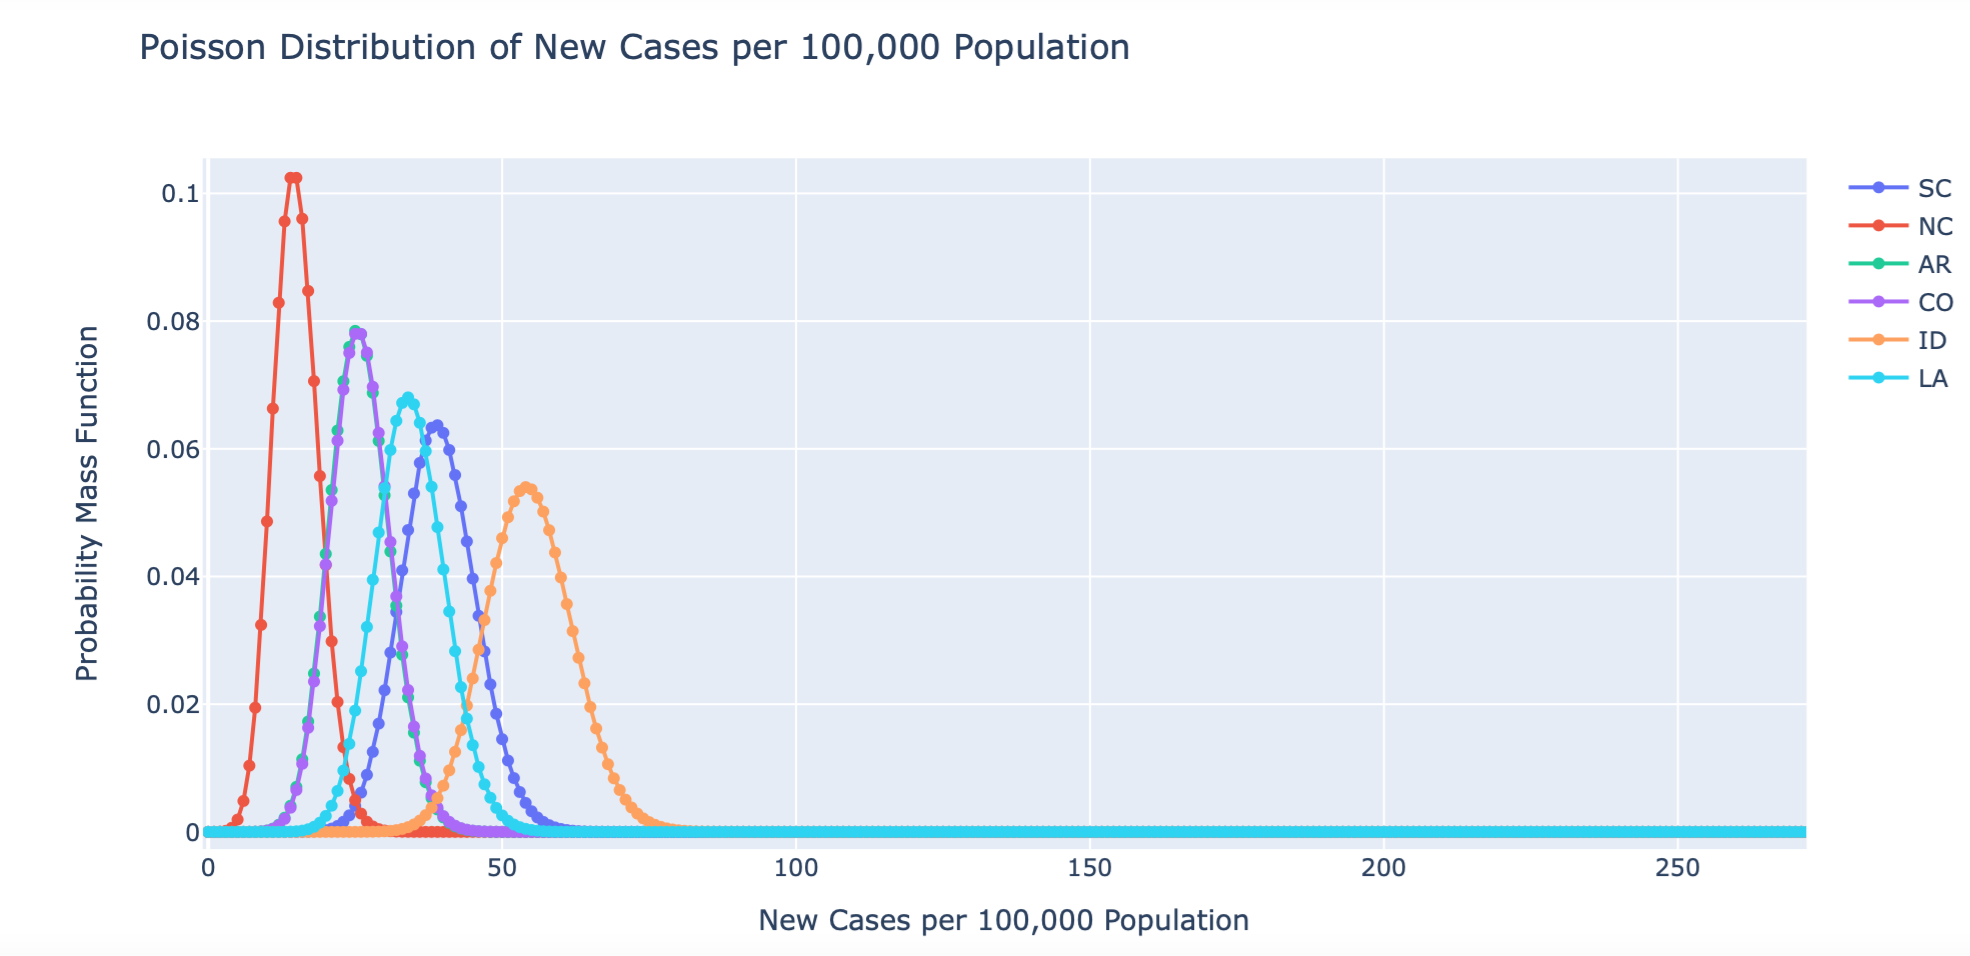

* The plot represents the probability mass function (PMF) of new cases per 100,000 population across different states. 
* Each line represents a state (SC, NC, AR, CO, ID, LA), showing the probability distribution of new cases per 100,000 population for that particular state. 
* The x-axis displays the number of new cases per 100,000 population, while the y-axis represents the probability of observing each number of new cases. 
* The distribution of new cases per 100,000 population appears highly skewed, with a majority of states having a low probability of observing a high number of new cases per 100,000 population, indicating that most states are experiencing relatively low levels of new cases per capita.

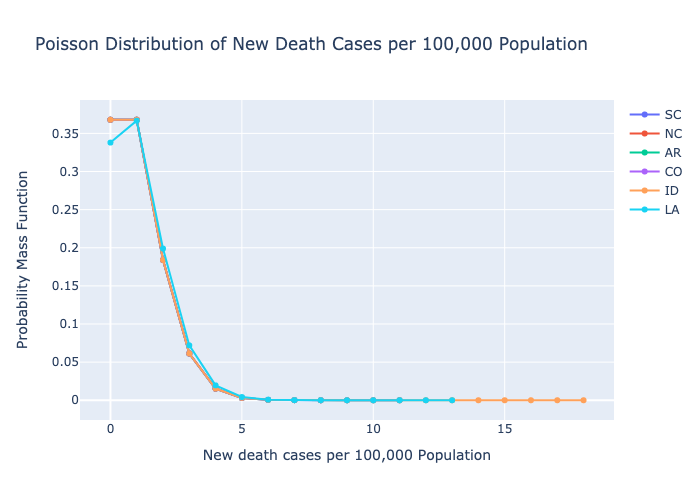

In [26]:
def process_state_data(state, death_data, population_data, traces):
    # Retrieve data for the specified state
    state_covid_data = death_data[death_data['State'] == state].copy()
    state_population = population_data[population_data['State'] == state]['population'].sum()

    # Calculate new death cases per 100,000 population
    state_covid_data.loc[:, 'new_deaths_popu'] = (state_covid_data['new_deaths'] / state_population) * 100000
    mean_value = max(state_covid_data['new_deaths_popu'].mean(), 1.0)

    # Model the Poisson distribution
    poisson_dist = poisson(mean_value)
    x = list(range(0, int(state_covid_data['new_deaths_popu'].max()) + 1))
    pmf = poisson_dist.pmf(x)

    # Create a trace
    trace = go.Scatter(x=x, y=pmf, mode='lines+markers', name=state)
    # print(trace)
    traces.append(trace)

def plot_poisson_distribution_for_states(states):
    # Load data
    death_data = pd.read_csv("modified_deaths.csv")
    population_data = pd.read_csv("covid_county_population_usafacts.csv")

    # Preprocess data
    death_data['date'] = pd.to_datetime(death_data['date'])
    death_data = death_data.sort_values(by=['date']).reset_index(drop=True)
    grouped = death_data.groupby('date')
    death_data['new_deaths'] = grouped['deaths'].diff().fillna(0)
    death_data['new_deaths'] = death_data['new_deaths'].apply(lambda x: max(0, x))

    # Create an empty list to store traces
    traces = []

    # Create Plotly figure
    fig = go.Figure()

    # Process data for each state
    for state in states:
        process_state_data(state, death_data, population_data, traces)

    # Add all traces to the figure
    fig.add_traces(traces)

    # Update layout
    fig.update_layout(title_text="Poisson Distribution of New Death Cases per 100,000 Population",
                      xaxis_title="New death cases per 100,000 Population",
                      yaxis_title="Probability Mass Function")

    # Show the plot
    #fig.show()
    static_image = pio.to_image(fig, format="png")
    display(Image(static_image))

# Example usage for multiple states
plot_poisson_distribution_for_states(['SC', 'NC', 'AR', 'CO', 'ID', 'LA'])


* The above plot depicts the probability mass function (PMF) of new death cases per 100,000 population across different states (SC, NC, AR, CO, ID, LA). 
* Each line represents a state, showcasing the probability distribution of new death cases per 100,000 population. The x-axis displays the number of new death cases per 100,000 population, while the y-axis represents the probability of observing each number of new death cases. 
* The distribution appears to be skewed, with a majority of states having a higher probability of observing fewer new death cases per 100,000 population, indicating that most states are experiencing relatively low levels of new death cases per capita.

### Perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns.

In [27]:
enrichment=pd.read_csv("senate_county.csv")
state_enrich=enrichment[enrichment["State"]=="SC"]
state_enrich.head()

,State,County Name,current_votes,total_votes,percent
2490,SC,Abbeville County,12439,12439,100
2491,SC,Aiken County,85164,85185,100
2492,SC,Allendale County,3625,3625,100
2493,SC,Anderson County,96035,96093,100
2494,SC,Bamberg County,6477,6482,100


* The above code aims to focus on and extract data specific to South Carolina from the larger dataset.

In [28]:
case_data

,countyFIPS,County Name,State,StateFIPS,population,date,cases
40,0,Statewide Unallocated,SC,45,0,2020-07-01,0
2367,45001,Abbeville County,SC,45,24527,2020-07-01,113
2368,45003,Aiken County,SC,45,170872,2020-07-01,406
2369,45005,Allendale County,SC,45,8688,2020-07-01,50
2370,45007,Anderson County,SC,45,202558,2020-07-01,635
...,...,...,...,...,...,...,...
586727,45083,Spartanburg County,SC,45,319785,2020-12-31,19756
586728,45085,Sumter County,SC,45,106721,2020-12-31,5519
586729,45087,Union County,SC,45,27316,2020-12-31,1551
586730,45089,Williamsburg County,SC,45,30368,2020-12-31,2213


* Displaying the covid data for only SC state in the above cell

In [29]:
population_data = pd.read_csv("covid_county_population_usafacts.csv")
pop=population_data[population_data['State']=='SC']
pop.head()

,countyFIPS,County Name,State,population
2356,0,Statewide Unallocated,SC,0
2357,45001,Abbeville County,SC,24527
2358,45003,Aiken County,SC,170872
2359,45005,Allendale County,SC,8688
2360,45007,Anderson County,SC,202558


* Obtaing the population of each county in SC state from the population dataset

#### compare either within your chosen specific state or among different states with the different enrichment variables. Within the state you can compare the county based covid data to enrichment data for correlation.

In [30]:
county_fips_data = {
    'County Name': ['Aiken County','Chester County', 'Florence County', 'Laurens County','York County'],
    'countyFIPS': [45003,45023, 45041, 45059, 45091]
}
county_fips = pd.DataFrame(county_fips_data)
counties=['Aiken County','Chester County', 'Florence County', 'Laurens County','York County']
senate_cou=state_enrich[state_enrich['County Name'].isin(counties)]
Senate_counties = pd.merge(county_fips,senate_cou, on='County Name')
Senate_counties

,County Name,countyFIPS,State,current_votes,total_votes,percent
0,Aiken County,45003,SC,85164,85185,100
1,Chester County,45023,SC,15742,15757,100
2,Florence County,45041,SC,64615,64615,100
3,Laurens County,45059,SC,30471,30488,100
4,York County,45091,SC,143882,144050,100


* Appending FIPS numbers to their respective states to facilitate data manipulation using FIPS (Note: FIPS numbers are not present in my enrichment data).
* Choosing specific counties within the state of South Carolina.
* Filtering the enrichment data exclusively for the specified counties in the dataset.
* Presenting the filtered enrichment data.

In [31]:
cou=[45003,45023, 45041, 45059, 45091]
case_cou = case_data[case_data['countyFIPS'].isin(cou)]
case_cou

,countyFIPS,County Name,State,StateFIPS,population,date,cases
2368,45003,Aiken County,SC,45,170872,2020-07-01,406
2378,45023,Chester County,SC,45,32244,2020-07-01,188
2387,45041,Florence County,SC,45,138293,2020-07-01,1230
2396,45059,Laurens County,SC,45,67493,2020-07-01,488
2412,45091,York County,SC,45,280979,2020-07-01,1256
...,...,...,...,...,...,...,...
586687,45003,Aiken County,SC,45,170872,2020-12-31,9156
586697,45023,Chester County,SC,45,32244,2020-12-31,2247
586706,45041,Florence County,SC,45,138293,2020-12-31,10494
586715,45059,Laurens County,SC,45,67493,2020-12-31,3609


* Filtering the spified counties for covid 19 cases dataset and displaying them.

In [32]:
pop_coun=pop[pop['County Name'].isin(counties)]
pop_coun

,countyFIPS,County Name,State,population
2358,45003,Aiken County,SC,170872
2368,45023,Chester County,SC,32244
2377,45041,Florence County,SC,138293
2386,45059,Laurens County,SC,67493
2402,45091,York County,SC,280979


* filtering the populations for the specified counties in population dataset.

In [33]:
sum_cases=case_cou.groupby('County Name')['cases'].sum()
case_cou['Total Cases'] = case_cou['County Name'].map(sum_cases)
case_cou


/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_9025/138001700.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,countyFIPS,County Name,State,StateFIPS,population,date,cases,Total Cases
2368,45003,Aiken County,SC,45,170872,2020-07-01,406,737855
2378,45023,Chester County,SC,45,32244,2020-07-01,188,199606
2387,45041,Florence County,SC,45,138293,2020-07-01,1230,926260
2396,45059,Laurens County,SC,45,67493,2020-07-01,488,332332
2412,45091,York County,SC,45,280979,2020-07-01,1256,1158404
...,...,...,...,...,...,...,...,...
586687,45003,Aiken County,SC,45,170872,2020-12-31,9156,737855
586697,45023,Chester County,SC,45,32244,2020-12-31,2247,199606
586706,45041,Florence County,SC,45,138293,2020-12-31,10494,926260
586715,45059,Laurens County,SC,45,67493,2020-12-31,3609,332332


In the above cell
* Grouped the 'case_cou' DataFrame by 'County Name' and calculated the sum of 'cases' for each county. 
* Then, created a new column 'Total Cases' in 'case_cou' to store the total cases corresponding to each county and displayed the updated DataFrame.

In [34]:
merged=pd.merge(case_cou,pop_coun,on=('countyFIPS'))
merged1=pd.merge(case_cou,Senate_counties,on=('countyFIPS'))
pop_coun
merged1

,countyFIPS,County Name_x,State_x,StateFIPS,population,date,cases,Total Cases,County Name_y,State_y,current_votes,total_votes,percent
0,45003,Aiken County,SC,45,170872,2020-07-01,406,737855,Aiken County,SC,85164,85185,100
1,45003,Aiken County,SC,45,170872,2020-07-02,434,737855,Aiken County,SC,85164,85185,100
2,45003,Aiken County,SC,45,170872,2020-07-03,451,737855,Aiken County,SC,85164,85185,100
3,45003,Aiken County,SC,45,170872,2020-07-04,488,737855,Aiken County,SC,85164,85185,100
4,45003,Aiken County,SC,45,170872,2020-07-05,507,737855,Aiken County,SC,85164,85185,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,45091,York County,SC,45,280979,2020-12-27,14613,1158404,York County,SC,143882,144050,100
916,45091,York County,SC,45,280979,2020-12-28,14692,1158404,York County,SC,143882,144050,100
917,45091,York County,SC,45,280979,2020-12-29,14818,1158404,York County,SC,143882,144050,100
918,45091,York County,SC,45,280979,2020-12-30,14939,1158404,York County,SC,143882,144050,100


* Initially, we combine the population data with the COVID-19 data to utilize population values for normalization. * Subsequently, we merge the resulting modified data with the enrichment data to leverage enrichment variables. 
* The resultant modified dataset, referred to as 'merged1,' is utilized for subsequent analysis.

In [35]:
selected_columns =['countyFIPS', 'County Name_x', 'State_x', 'StateFIPS', 'date', 'cases', 'Total Cases','population','current_votes','total_votes','percent']  # Replace these with the column names you need
counties_case_senate=merged1[selected_columns]
counties_case_senate

,countyFIPS,County Name_x,State_x,StateFIPS,date,cases,Total Cases,population,current_votes,total_votes,percent
0,45003,Aiken County,SC,45,2020-07-01,406,737855,170872,85164,85185,100
1,45003,Aiken County,SC,45,2020-07-02,434,737855,170872,85164,85185,100
2,45003,Aiken County,SC,45,2020-07-03,451,737855,170872,85164,85185,100
3,45003,Aiken County,SC,45,2020-07-04,488,737855,170872,85164,85185,100
4,45003,Aiken County,SC,45,2020-07-05,507,737855,170872,85164,85185,100
...,...,...,...,...,...,...,...,...,...,...,...
915,45091,York County,SC,45,2020-12-27,14613,1158404,280979,143882,144050,100
916,45091,York County,SC,45,2020-12-28,14692,1158404,280979,143882,144050,100
917,45091,York County,SC,45,2020-12-29,14818,1158404,280979,143882,144050,100
918,45091,York County,SC,45,2020-12-30,14939,1158404,280979,143882,144050,100


* Within the modified dataset, certain columns may not be relevant for subsequent processing.
* We extract only the essential columns, storing them along with their corresponding data in a variable named 'counties_case_senate' in the preceding cell.

### For number of covid cases you can use a measure of center value (median or mean) to compare the number of cases.

In [36]:
mean_ca= counties_case_senate.groupby('County Name_x')['cases'].mean().reset_index()
mean_ca.columns = ['County Name_x', 'mean']  # Rename the columns
counties_case_senate = pd.merge(counties_case_senate,mean_ca, on='County Name_x')
counties_case_senate

,countyFIPS,County Name_x,State_x,StateFIPS,date,cases,Total Cases,population,current_votes,total_votes,percent,mean
0,45003,Aiken County,SC,45,2020-07-01,406,737855,170872,85164,85185,100,4010.081522
1,45003,Aiken County,SC,45,2020-07-02,434,737855,170872,85164,85185,100,4010.081522
2,45003,Aiken County,SC,45,2020-07-03,451,737855,170872,85164,85185,100,4010.081522
3,45003,Aiken County,SC,45,2020-07-04,488,737855,170872,85164,85185,100,4010.081522
4,45003,Aiken County,SC,45,2020-07-05,507,737855,170872,85164,85185,100,4010.081522
...,...,...,...,...,...,...,...,...,...,...,...,...
915,45091,York County,SC,45,2020-12-27,14613,1158404,280979,143882,144050,100,6295.673913
916,45091,York County,SC,45,2020-12-28,14692,1158404,280979,143882,144050,100,6295.673913
917,45091,York County,SC,45,2020-12-29,14818,1158404,280979,143882,144050,100,6295.673913
918,45091,York County,SC,45,2020-12-30,14939,1158404,280979,143882,144050,100,6295.673913


The above line of code, 
- groups the DataFrame by the 'County Name_x' column 
- calculates the mean of COVID-19 cases for each county
- resets the index to make the grouping result into a regular DataFrame structure.

In [37]:
counties_case_senate.dtypes

countyFIPS                int64
County Name_x            object
State_x                  object
StateFIPS                 int64
date             datetime64[ns]
cases                     int64
Total Cases               int64
population                int64
current_votes             int64
total_votes               int64
percent                   int64
mean                    float64
dtype: object

* Examining the data types of variables utilized for normalization and correlation analysis.

In [38]:
l=[]
for i in range(5,len(counties_case_senate.columns)):
    l.append(counties_case_senate.columns[i])
print(l)

['cases', 'Total Cases', 'population', 'current_votes', 'total_votes', 'percent', 'mean']


* Compiling all necessary column names into a list.

In [39]:
counties_case_senate=counties_case_senate.replace('N',0)
for i in l:
    counties_case_senate[i] = counties_case_senate[i].astype(float)
counties_case_senate['StateFIPS'] = counties_case_senate['StateFIPS'].astype(float)
counties_case_senate.dtypes

countyFIPS                int64
County Name_x            object
State_x                  object
StateFIPS               float64
date             datetime64[ns]
cases                   float64
Total Cases             float64
population              float64
current_votes           float64
total_votes             float64
percent                 float64
mean                    float64
dtype: object

* Converting all essential columns and their values to float data type to facilitate ease of calculation for normalization and correlation analysis.

### Both covid and enrichment data will need to be normalized for population.

In [40]:
data=counties_case_senate
columns=['cases', 'Total Cases', 'current_votes', 'total_votes', 'percent', 'mean']
for col in columns:
    data[col] = data[col] / data['population'] 
    
columns1=['cases', 'Total Cases', 'current_votes', 'total_votes', 'percent', 'mean']
for col in columns1:
    data[col] = data[col] *100000
data


,countyFIPS,County Name_x,State_x,StateFIPS,date,cases,Total Cases,population,current_votes,total_votes,percent,mean
0,45003,Aiken County,SC,45.0,2020-07-01,237.604757,431817.383773,170872.0,49840.816518,49853.106419,58.523339,2346.833607
1,45003,Aiken County,SC,45.0,2020-07-02,253.991292,431817.383773,170872.0,49840.816518,49853.106419,58.523339,2346.833607
2,45003,Aiken County,SC,45.0,2020-07-03,263.940259,431817.383773,170872.0,49840.816518,49853.106419,58.523339,2346.833607
3,45003,Aiken County,SC,45.0,2020-07-04,285.593895,431817.383773,170872.0,49840.816518,49853.106419,58.523339,2346.833607
4,45003,Aiken County,SC,45.0,2020-07-05,296.713329,431817.383773,170872.0,49840.816518,49853.106419,58.523339,2346.833607
...,...,...,...,...,...,...,...,...,...,...,...,...
915,45091,York County,SC,45.0,2020-12-27,5200.744540,412274.226900,280979.0,51207.385605,51267.176551,35.589848,2240.620798
916,45091,York County,SC,45.0,2020-12-28,5228.860520,412274.226900,280979.0,51207.385605,51267.176551,35.589848,2240.620798
917,45091,York County,SC,45.0,2020-12-29,5273.703729,412274.226900,280979.0,51207.385605,51267.176551,35.589848,2240.620798
918,45091,York County,SC,45.0,2020-12-30,5316.767445,412274.226900,280979.0,51207.385605,51267.176551,35.589848,2240.620798


* The code above normalizes specified columns in a dataframe data by dividing their values by the population of each county, and then scales them by multiplying by 100,000. 
* The resulting modified dataframe 'data' is returned and displayed.

### Between states you would need to aggregate to state level data and then perform correlation

In [41]:
dat=data.drop(['StateFIPS'], axis=1)
numeric_data = dat.select_dtypes(include='number')

correlation = numeric_data.corr()
correlation

,countyFIPS,cases,Total Cases,population,current_votes,total_votes,percent,mean
countyFIPS,1.000000,-0.106058,-0.283365,0.498347,0.061360,0.066463,-0.321693,-0.283365
cases,-0.106058,1.000000,0.374281,-0.225923,-0.184938,-0.185366,0.185253,0.374281
Total Cases,-0.283365,0.374281,1.000000,-0.603619,-0.494115,-0.495260,0.494959,1.000000
population,0.498347,-0.225923,-0.603619,1.000000,0.672530,0.671177,-0.833929,-0.603619
current_votes,0.061360,-0.184938,-0.494115,0.672530,1.000000,0.999965,-0.235883,-0.494115
total_votes,0.066463,-0.185366,-0.495260,0.671177,0.999965,1.000000,-0.231782,-0.495260
percent,-0.321693,0.185253,0.494959,-0.833929,-0.235883,-0.231782,1.000000,0.494959
mean,-0.283365,0.374281,1.000000,-0.603619,-0.494115,-0.495260,0.494959,1.000000


* Given that we're utilizing counties within the same state, the State FIPS values remain constant across the entire dataset.
* During correlation calculation, null values are obtained for the State FIPS.
* These values offer no substantial assistance in analyzing county data as they are uniform.
* Therefore, it's preferable to remove the State FIPS column before conducting correlation analysis.
* Subsequently, correlation is computed for the adjusted dataset.

#### corelation between Enrichment data valiables and COVID-19 cases to observe any patterns.

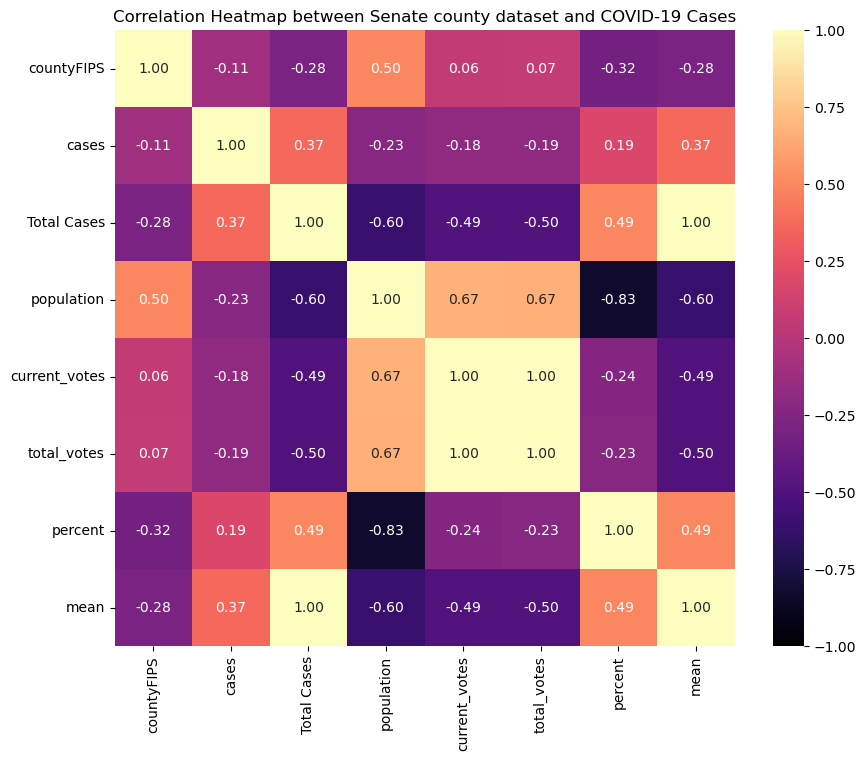

In [43]:
def plot_correlation_heatmap(c_matrix, title='Correlation Heatmap', cmap='magma'):
    plt.figure(figsize=(10, 8))
    sns.heatmap(c_matrix, annot=True, cmap=cmap, fmt='.2f', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

plot_correlation_heatmap(correlation, 'Correlation Heatmap between Senate county dataset and COVID-19 Cases')

* The above correlation matrix displays the relationships between various variables. 
* Each cell represents the correlation coefficient between two variables, ranging from -1 to 1. 
* A value closer to 1 indicates a strong positive correlation, while a value closer to -1 indicates a strong negative correlation. 
* Values near 0 suggest weak or no correlation. 
* Utilizing a heatmap visually represents the strength and direction of correlations, aiding in identifying patterns and relationships within the dataset.

### Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose 3 different variables to compare against.

* Hypothesis 1:
    - Null Hypothesis (H0): There is no significant correlation between the percentage of votes in the Senate county dataset and the number of COVID-19 cases in the corresponding counties.
    - Alternative Hypothesis (H1): There is a significant correlation between the percentage of votes in the Senate county dataset and the number of COVID-19 cases in the corresponding counties.
    - Variables: percent (from Senate county dataset) and cases (from US COVID dataset)

* Hypothesis 2:
    - Null Hypothesis (H0): There is no significant correlation between the population size of counties and the number of COVID-19 cases in those counties.
    - Alternative Hypothesis (H1): There is a significant correlation between the population size of counties and the number of COVID-19 cases in those counties.
    - Variables: population (from US COVID dataset) and cases (from US COVID dataset)

* Hypothesis 3:
    - Null Hypothesis (H0): There is no significant correlation between the current votes in the Senate county dataset and the number of COVID-19 cases in the corresponding counties.
    - Alternative Hypothesis (H1): There is a significant correlation between the current votes in the Senate county dataset and the number of COVID-19 cases in the corresponding counties.
    - Variables: current_votes (from Senate county dataset) and cases (from US COVID dataset)